# Homework 3: Multiple Linear Regression
***

**Name**: Sasi Jyothirmai Bonu

***

This assignment is due on Gradescope by **Friday March 1 at 5:59PM**. If you submit the assignment  by this deadline, you will receive 5 bonus points. If you need a little extra time, you may submit your work by **Monday March 4 at 5:59PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- There are 3 total questions on this assignment. 
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 



---

---


### Problem 1 - Analysis of Regression Coefficients (15 points)

**Part A:**  In class, we analyzed regression with an intercept, $\beta_0$. In some circumstances, we may have theoretical reasons to suggest that the intercept term is zero. As such, some have proposed to not estimate $\beta_0$, and instead, use the one-predictor linear model: $Y_i = \beta_1 x_i + \epsilon_i$. 

Find the least squares estimator of $\beta_1$.

Minimizing the sum of squared residuals:

$$  S = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $$

Since there is no intercept, $ ( \hat{Y}_i = \beta_1 x_i ) $.

So,

$$  S = \sum_{i=1}^{n} (Y_i - \beta_1 x_i)^2  $$

To find the minimum, take the derivative of $ S $ with respect to $ \beta_1 $ which should be equal to zero:

$$  \frac{dS}{d\beta_1} = 0  $$


$$  \frac{d}{d\beta_1} \left( \sum_{i=1}^{n} (Y_i^2 - 2\beta_1 x_i Y_i + \beta_1^2 x_i^2) \right) = 0  $$

$$  \sum_{i=1}^{n} (-2x_i Y_i + 2\beta_1 x_i^2) = 0  $$

$$  -2 \sum_{i=1}^{n} x_i Y_i + 2\beta_1 \sum_{i=1}^{n} x_i^2 = 0  $$

For $ ( \beta_1 ) $:

$$  \beta_1 \sum_{i=1}^{n} x_i^2 = \sum_{i=1}^{n} x_i Y_i  $$

$$  \beta_1 = \frac{\sum_{i=1}^{n} x_i Y_i}{\sum_{i=1}^{n} x_i^2}  $$

Hence, the least squares estimator of $ \beta_1 $ without an intercept is:

$$  \hat{\beta}_1 = \frac{\sum_{i=1}^{n} x_i Y_i}{\sum_{i=1}^{n} x_i^2}  $$

**Part B:** Show that the residuals of this model fit do not sum necessarily sum to zero. You can use a simulation to show this, if you would like.

In [25]:
set.seed(7)
n <- 100 
beta1 <- 2  
x <- rnorm(n) 
e <- rnorm(n, sd = 0.5)  
Y <- beta1 * x + e

lr <- lm(Y ~ x - 1)

res <- resid(lr)

sum_residuals <- sum(res)
print(paste("Sum of residuals:", sum_residuals))

[1] "Sum of residuals: 6.3201529331411"


The sum of the residuals is 6.320 which is not 0.

**Part C:** Suppose that, for $i = 1,...,n$, the pairs $(x_i, y_i)$ are generated according to a simple linear regression model 

$$Y_i = \beta_0 + \beta_1x_i + \varepsilon_i,$$

where $x_i$ are fixed constants and $\varepsilon_i \overset{iid}{\sim} N(0,\sigma^2)$. Then, imagine reparameterizing the model as

$$Y_i = \beta^*_0 + \beta^*_1\left(\frac{x_i- \bar{x}}{sd(x)}\right) + \varepsilon_i,$$

where $sd(x) = \frac{1}{n-1}\sum(x_i - \bar{x})^2$.

Let $\widehat\beta_j$ be the least squares estimator of $\beta_j$, and $\hat\beta^*_j$ be the least squares estimator of $\beta^*_j$ for $j=0,1$.

Show that $\widehat\beta^*_1 \ne \widehat\beta_1$.**

HINT: For regression with one predictor, $\displaystyle \widehat\beta_1 = \frac{\sum^n_{i=1}\left( x_i - \bar{x}\right)\left(y_i - \bar{y} \right)}{\sum^n_{i=1}\left(x_i - \bar{x}\right)^2}$.

To show that $ \hat{\beta}^*_1 \neq \hat{\beta}_1 $, calculate both estimators.

First, let's calculate $ \hat{\beta}_1 $, the least squares estimator of $ \beta_1 $ in the original model:

$ \hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} $

Now, let's calculate $ \hat{\beta}^*_1 $, the least squares estimator of $ \beta^*_1 $ in the reparameterized model:

$ \hat{\beta}^*_1 = \frac{\sum_{i=1}^{n} \left(x_i - \bar{x}\right)\left(y_i - \bar{y} \right)}{\sum_{i=1}^{n} \left(\frac{x_i - \bar{x}}{sd(x)}\right)^2} $

In the reparameterized model, $ \frac{x_i - \bar{x}}{sd(x)} $ is used instead of $ x_i - \bar{x} $. This means that the least squares estimator in the reparameterized model scales the predictor variable by its standard deviation.

To show that $ \hat{\beta}^*_1 \neq \hat{\beta}_1 $, simplify

$
\sum^n_{i=1}\left(\frac{x_i - \bar{x}}{sd(x)}\right) = \frac{1}{sd(x)}\sum^n_{i=1}(x_i - \bar{x}) 
$

${\sum^n_{i=1}\left(\frac{x_i - \bar{x}}{sd(x)}\right)^2}= \frac{1}{sd(x)^2}\sum^n_{i=1}(x_i - \bar{x})^2$

Hence, 

$
\hat\beta^*1 = {sd(x)}\frac{\sum^n{i=1}\left( x_i - \bar{x}\right)\left(y_i - \bar{y} \right)}{\sum^n_{i=1}(x_i - \bar{x})^2}
$

which is  $ \hat\beta^*_1 = {sd(x)}\widehat\beta_1 $

Hence, $\hat\beta^*_1 \ne \hat\beta_1$

**Part D:** Show that, in general, $\widehat\beta^*_0 \ne \widehat\beta_0$, and find $\widehat\beta^*_0$ in terms of $Y_i$. In what particular case is $\widehat\beta^*_0 = \widehat\beta_0$?**

HINT: For SLR, $\widehat\beta_0 = \bar{y} - \widehat\beta_1 \bar{x}$.


Reparameterized model is

$\hat Y_i =\hat \beta_0^* + \hat \beta_1^*(\frac{x_i-\overline{x}}{sd(x)}) + \varepsilon_i$  and $SSE = Σ_{i=1}^n (Y_i - \hat{Y_i})^2$

Hence,

$Σ_{i=1}^n (Y_i - (\hatβ_0^* + \hatβ_1^*(\frac{x_i-\overline{x}}{sd(x)})))^2$  

To find $\hat\beta_0^*$, minimise SSE w.r.t. $\hat\beta_0^*$.

Take the derivative and set it to 0,

 $\frac{∂SSE}{∂\hat\beta_0^*}=0$  

 By chain rule,

$2Σ_{i=1}^n (Y_i - (\hatβ_0^* + \hatβ_1^*(\frac{x_i-\overline{x}}{sd(x)})))(-1) = 0$  

$Σ_{i=1}^nY_i - \hat\beta_0^*Σ_{i=1}^n - \hat\beta_1^*Σ_{i=1}^n\ (\frac{x_i-\overline{x}}{sd(x)}) = 0$ 

Since  $Σ_{i=1}^nY_i$ is the mean, and adding $\hat\beta_0^*$ n times is $n\hat\beta_0^*$

$n \overline Y - n\hat\beta_0^* - \hat\beta_1^*Σ_{i=1}^n\ (\frac{x_i-\overline{x}}{sd(x)}) = 0$  

$n \overline Y - n\hat\beta_0^* - \frac{\hat\beta_1^*}{sd(x)}[Σ_{i=1}^nx_i - Σ_{i=1}^n \overline x] = 0$   

Similarly,

$n \overline Y - n\hat\beta_0^* - \frac{\hat\beta_1^*}{sd(x)}[ {n\overline x} - {n \overline x}] = 0$  

$ \hatβ_0^* = \overline Y $  

For the original model, 

$\hat\beta_0 = \overline Y - \hat\beta_1 \overline x$  

By comparing both, 

$\hat \beta_0^* \ne \hat \beta_0$, unless mean= $0$



**Part E:** Why might the reparameterized model be beneficial?

Reparameterized model might be beneficial for several reasons such as:

1. Reparameterized model can enhance interpretability by making coefficients comparable.
2. It can also improve model stability by ensuring reliable estimates.
3. It will also reduce non-identifiability and multicollinearity. 

**Part F:** Run a simulation to confirm your result in parts 1(c) - 1(d). Let's do this in parts. In the cell directly below:**

- Set `n = 50`, $\boldsymbol\beta = $ `beta = c(1, 3.5)`.
- Simulate $n$ predictor values ($x$) randomly from $N(3,1)$. Store those values in a variable `x`. 
- Simulate $n$ random error terms from $N(0,2)$. Store them in the variable `e`.
- Calculate the response ($y$) according to `y = b0 + b1 x + e`
- Fit a simple linear regression model to the data using the `lm()` function. Store the `lm()` object in a variable `l` and the coefficients of that model in a variable `b1 = coef(l)`.

In [26]:
set.seed(7)
n <- 50
beta <- c(1, 3.5)

x <- rnorm(n, mean = 3, sd = 1)
e <- rnorm(n, mean = 0, sd = 2)

y <- beta[1] + beta[2] * x + e

l <- lm(y ~ x)
b1 <- coef(l)

print(b1)


(Intercept)           x 
   1.662087    3.319458 


The coefficients of the model are 1.662087(intercept) and 3.319458 (x-coefficient).

**Part G:**

- Center and scale the predictor values and store those values in a variable `z`.
- Fit a simple linear regression model to the new data, $(z_i, y_i)$, using the `lm()` function. Store the `lm()` object in a variable `l2` and the coefficients of that model in a variable `b2 = coef(l2)` (`b2` should be a vector of length $2$).
- Describe the differences between `b` and `b2`.

In [27]:
z <- scale(x, center = TRUE, scale = TRUE)

l2 <- lm(y ~ z)
b2 <- coef(l2)

print(b2)

print("Difference between b1 and b2:")
print(b1 - b2)


(Intercept)           z 
  12.412853    3.350154 
[1] "Difference between b1 and b2:"
 (Intercept)            x 
-10.75076519  -0.03069553 


The coefficients of the model are 12.412853 (intercept) and 3.350154 (x-coefficient). Hence the difference is -10.75076519 (intercept) and -0.03069553  (x-coefficient).


---


### Problem 2 - Polynomial Regression via Multiple Linear Regression (15 points)

It's not too difficult to believe that some relationships between features and the response are nonlinear. Consider the following example, where the single feature $x$ and the response $y$ have a quadratic relationship of the form 

$$
Y = \frac{1}{4} - X + X^2 + \epsilon 
$$

**Part A:** Write code that samples $n=30$ data points from the true model, fits the SLR model, and plots it against the data. It should be clear from both the picture and the $R^2$-value that the SLR model is a very poor fit of the data. 

[1] 0.4860086


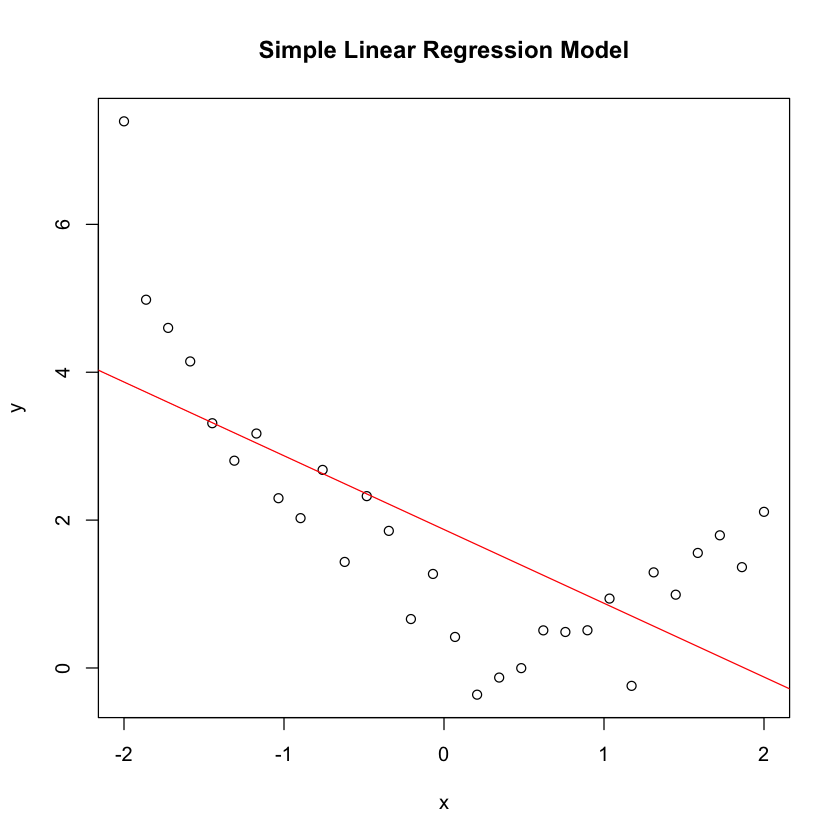

In [28]:
set.seed(7)

n <- 30
x <- seq(-2, 2, length.out = n)

y <- 1/4 - x + x^2 + rnorm(n, mean = 0, sd = 0.5)

slr <- lm(y ~ x)

r_square <- summary(slr)$r.squared

print(r_square)

plot(x, y, main = "Simple Linear Regression Model", xlab = "x", ylab = "y")
abline(slr, col = "red")



The r squared is 0.4860086, which is a clear indication that it's not a good fit. It can also be seen in the plot above that the mnodel doesn't fit the data at all.

**Part B**: We can fit a **polynomial** model to the single-feature data be thinking of the polynomial features as features in a multiple linear regression model.  If we make the association  

$$
x_1 = x \quad \textrm{and} \quad x_2 = x^2 
$$

then we can fit a multiple linear regression of the form 

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 
$$

Fit this model and print the regression coefficients to the screen. 

In [29]:
x2 <- x^2

poly <- lm(y ~ x + x2)

print(coef(poly))


(Intercept)           x          x2 
  0.6351671  -0.9977644   0.8685643 


The coefficients of the polynomial fit are 0.6351671 (intercept), -0.9977644 (x-coefficient), and 0.8685643 (x2-coefficient).

**Part C**: Write down the estimated MLR model in terms of the features $x_1$ and $x_2$ as well as the interpretation of the associated polynomial model in terms of the single feature $x$. Does this model seem close to the true model that the data was generated from?  

The estimated multiple linear regression (MLR) model in terms of the features $x_1$ and $x_2$ is:

$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 $

Substituting $x_1 = x$ and $x_2 = x^2$, we get:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x + \hat{\beta}_2 x^2$

This represents a polynomial regression model of degree 2.

The interpretation of the associated polynomial model in terms of the single feature $x$ is that it captures both linear and quadratic relationships between $x$ and $y$. 

We may compare the coefficients of the estimated MLR model to the coefficients of the genuine model to evaluate if the model appears to be close to the true model from which the data was created. Similar coefficients indicate that the model is doing a good job of capturing the underlying relationship in the data.

Since the true model is

$$
Y = \frac{1}{4} - X + X^2 + \epsilon 
$$

For the fitted model,

$\beta_0 = 0.6351671, \beta_1 = -0.9977644, \beta_2 = 0.8685643$

For the true model,

$\beta_0 = 0.25, \beta_1 = -1, \beta_2 = 1$

Since the coefficients are pretty close, it can be determined that it's a good fit.


**Part D**: Plot the obtained polynomial regression model against the data.  Comment on the fit.

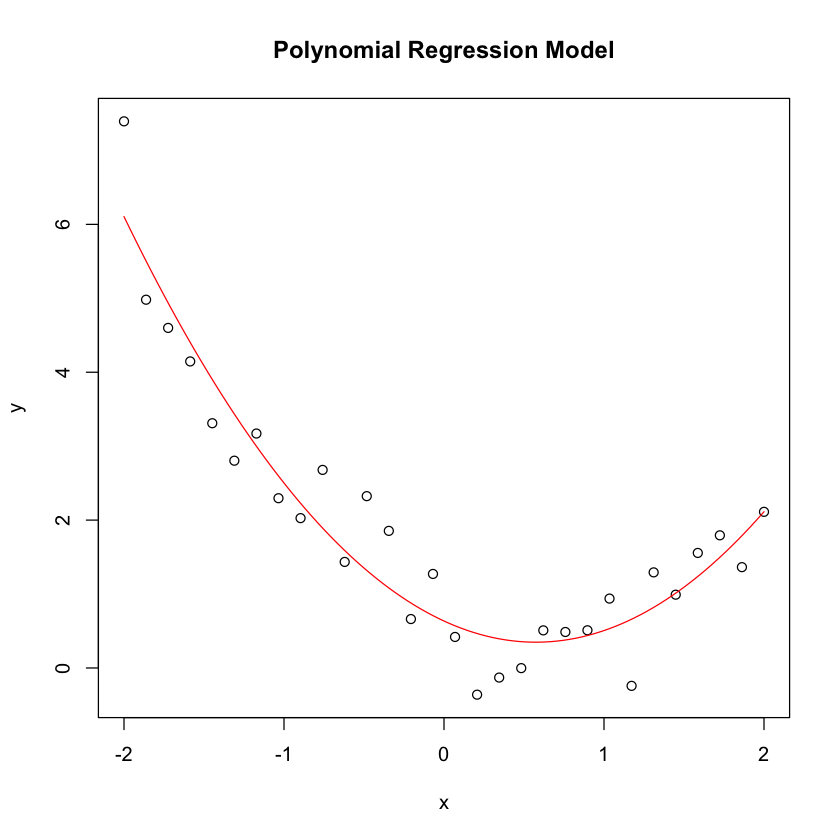

In [30]:
x_seq <- seq(min(x), max(x), length.out = 100)

y_pred <- coef(poly)[1] + coef(poly)[2] * x_seq + coef(poly)[3] * x_seq^2

plot(x, y, main = "Polynomial Regression Model", xlab = "x", ylab = "y")
lines(x_seq, y_pred, col = "red")


This polynomial fits the data much  better than the linear regression model. This fit goes through most of the points and provides a clear view of how the data is distributed. It also doesn't overfit the data making it a good fit.

**Part E:** Calculate the sum of squared errors, the total sum of squares, and the coefficient of determination for this polynomial regression model. How does the $R^2$ value compare to the linear regression of **Part B**?

In [31]:
y_hat <- predict(poly)

poly_resid <- y - y_hat

SSE <- sum(poly_resid^2)
mean_y <- mean(y)
SST <- sum((y - mean_y)^2)

SSR <- SST - SSE

r_squared <- SSR / SST

cat("Sum of Squared Errors (SSE) is", SSE, "\n")
cat("Total Sum of Squares (SST) is", SST, "\n")
cat("Coefficient of Determination (R-squared) is", r_squared, "\n")


Sum of Squared Errors (SSE) is 8.360587 
Total Sum of Squares (SST) is 87.5862 
Coefficient of Determination (R-squared) is 0.9045445 


The Sum of Squared Errors (SSE) is 8.360587, Total Sum of Squares (SST) is 87.5862, and Coefficient of Determination (R-squared) is 0.9045445.

---

### Problem 3 - Multiple Linear Regression and Model Selection (20 points)

We will further examine the `Fish.csv` dataset in this problem. 

"This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted."

**Response**:
- Weight (in grams)

**Features**:
- Length1 (vertical length in cm)
- Length2 (diagonal length in cm)
- Length3 (cross length in cm)
- Height (in cm)
- Width (diagonal width in cm)

The species name of the fish is also given. 

**Part A**: Read the data from the csv.  As you are reading in `Fish.csv`, drop the species column as it is non-numerical.

Also, make sure to re-order the columns so that the response variable is the last column.

In [32]:
fishes <- read.csv('Fish.csv')  #reading the data
head(fishes)

,Species,Weight,Length1,Length2,Length3,Height,Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bream,242,23.2,25.4,30.0,11.5200,4.0200
2,Bream,290,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363,26.3,29.0,33.5,12.7300,4.4555
5,Bream,430,26.5,29.0,34.0,12.4440,5.1340
6,Bream,450,26.8,29.7,34.7,13.6024,4.9274


In [33]:
fishes <- subset(fishes, select = -Species) #dropping species column
fishes <- fishes[, c(setdiff(names(fishes), "Weight"), "Weight")] #reordering
head(fishes)

,Length1,Length2,Length3,Height,Width,Weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23.2,25.4,30.0,11.5200,4.0200,242
2,24.0,26.3,31.2,12.4800,4.3056,290
3,23.9,26.5,31.1,12.3778,4.6961,340
4,26.3,29.0,33.5,12.7300,4.4555,363
5,26.5,29.0,34.0,12.4440,5.1340,430
6,26.8,29.7,34.7,13.6024,4.9274,450


**Part B:** Fit a multiple linear regression model to the data.

- print the regression coeficients to the screen.

- Use a Markdown cell to specify the MLR model in the form: $ \hat{y} = \beta_0+\beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p $

In [34]:
mlr_fishes <- lm(Weight ~ Length1 + Length2 + Length3 + Height + Width, data = fishes)
summary(coef(mlr_fishes))
#anova(mlr_fishes)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-499.587  -23.401    7.973  -70.336   26.841   62.355 

$ \hat{y} $ is the weight.
$ \beta_0 $ is the intercept
$\beta_1 + \beta_2 + \beta_3 + \beta_4 + \beta_5 $  are the coefficients for Length1, Length2, Length3, Height, and Width.

Hence the MLR model is 

$$ \hat{y} = \beta_0+\beta_1 Length1 + \beta_2 Length2 + \beta_3 Length3 + \beta_4 Height + \beta_5 Width $$


From the summary output, we can say that $\beta_0 = -499.587, \beta_1 =  62.355, \beta_2 = -6.527, beta_3 = -29.026, \beta_4 = 28.297,$ and $\beta_5 = 22.473$

So to explicitly write out the MLR model using the coefficients that were found,


$$ \hat{y} = -499.587 + 62.355 Length1  - 6.527 Length2 - 29.026 Length3 + 28.297 Height + 22.473 Width $$

$$or$$

$$ \hat{y} = -499.587 + 62.355 x_1  - 6.527 x_2 - 29.026 x_3 + 28.297 x_4 + 22.473 x_5 $$


**Part C**: Perform the appropriate statistical hypothesis test at the $\alpha = 0.01$ significance level to determine if _at least one_ of the features is related to the the response $y$.  

In [35]:
fish_anova = anova(mlr_fishes)
fish_anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Length1,1,16978060.28,16978060.28,1118.394999,3.074547e-72
Length2,1,235134.38,235134.38,15.488996,1.256175e-04
Length3,1,74108.89,74108.89,4.881772,2.862757e-02
Height,1,619028.34,619028.34,40.777226,1.939159e-09
Width,1,18474.42,18474.42,1.216965,2.716892e-01
Residuals,153,2322652.75,15180.74,NA,NA


In [36]:
l1 <- fish_anova$`Pr(>F)`[1]
alp <- 0.01

if (l1 < alp) {
  print("Reject the null hypothesis. At least one of the features is related to the response variable.")

} else {
  print("Fail to reject the null hypothesis. None of the features are related to the response variable.")
}


[1] "Reject the null hypothesis. At least one of the features is related to the response variable."


Here, we can reject the null hypothesis because at least one of the features is related to the response variable.

**Part D**: Write a function `forward_select(df, resp_str, maxk)` that takes in the DataFrame, the name of the column corresponding to the response, and the maximum number of desired features, and returns a list of feature names corresponding to the `maxk` most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$. Use your function to determine the best $k=3$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement **foward_select** yourself.  You may not call any R method that explicitly performs forward selection.

In [37]:
forward_select <- function(df, resp_str, maxk) {
  choose_feat<- c()  
  predictors<- setdiff(names(df), resp_str)

  model <- lm(as.formula(paste(resp_str, "~ 1")), data = df)  
  
  for (i in 1:maxk) {
    unselected_features <- setdiff(predictors, choose_feat)
    sse <- Inf
    top_feat <- NULL
    
    
    for (feature in unselected_features) {
      input_feat <- c(choose_feat, feature)
      model_feat <- as.formula(paste(resp_str, "~", paste(input_feat, collapse = "+")))
      new_model <- update(model, formula = model_feat)

      new_sse <- sum(residuals(new_model)^2)
      
      if (new_sse < sse) {
        sse <- new_sse
        top_feat <- feature
      }
    }
    
    
    choose_feat <- c(choose_feat, top_feat)
    cat("In stage", i, "the feature added is", top_feat, "\n")
  }
  
  return(choose_feat)
}

select_feat <- forward_select(fishes, "Weight", 3)
select_feat

In stage 1 the feature added is Length3 
In stage 2 the feature added is Width 
In stage 3 the feature added is Height 


[1] "Length3" "Width"   "Height"

Here, a loop has been used to select as many topmost features as specified. The loop makes a linear regression model using the best features and checks for Sum of Squared Errors (SSE). The lesser the SSE, the better the feature in determing the distribution. 

Length3, followed by Width, and then Height, appears to be the best attribute, according to the loop's output.

**Part E**: Write down the reduced multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

In [38]:
reduced_mlr_model <- as.formula(paste("Weight ~", paste(select_feat, collapse = "+")))
reduced_model <- lm(reduced_mlr_model, data = fishes)
summary(reduced_model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-520.999988,29.331364,-17.762556,3.297909e-39
Length3,19.444530,1.812478,10.728148,1.977242e-20
Width,62.832602,14.559949,4.315441,2.827496e-05
Height,3.853431,3.848711,1.001226,3.182778e-01
